<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals
* Understand how to obtain the 'best fit' of data for the linear case
* Be able to use calculate and use the pseudoinverse
* Watch out and exploit weighting

#Least squares regression

Generally, we will have some datapoint pairs $x_i, y_i$. We will have some function $y$ with parameters $a$ that will be evaluated at a point $x$: $y(a, x)$.

Our goal is to find the set of parameters $a$ that gives us the *best fit* of the data. Commonly, this implies minimizing the squared error between the prediction and the data,

$$y(a,x_i)-y_i = r_i$$.

where $r$ is the residual vector. The *least squares fit* is formulated as finding $a$ so as to minimize $\| r\|$.

In general, this is an optimization problem (much more complicated than you would expect!) since $y(a,x)$ can be complex.

#Linear least squares regression

Let's look at the *simpler* case first; in particular where $y$ is the sum of basis functions weighted by $a$ (e.g.: polynomial interpolation, radial basis functions... can you think of another one?).

In this case, $y=Ax$, and the data is inserted into $b$.
>CAUTION! We have swapped notation to follow suit with standard practice! The matrix A is the function of the 'position', $x$, and the parameters are in the vector!

Given a matrix system,
$$ A x = b$$
where $A$ is an $m\times n$ matrix, $x$ is $n$, and $b$ is $$. We cannot solve this for an exact $x$ with our normal techniques since $A$ is rectangular, not square.

Recalling the residual is $Ax-b$, let's broaden our concept to a 'solution' to say we want to minimize the (norm of the) residual.


$$Min_x \ of \ \| Ax-b\|=\frac{1}{2} [Ax-b]^T [Ax-b]$$

Setting $\frac{d}{dx} = 0$, we get:

\begin{align}
2 A^T [Ax-b] &= 0 \\
A^T A x &= A^T b \\
 x &= [A^T A]^{-1} A^T b \\
x &= A^† b
\end{align}

where $A^†=[A^T A]^{-1} A^T$ is called the *(Moore-Penrose) pseudoinverse* of $A$. The pseudoinverse is defined for any rectangular matrix. Note $A^T A$ is necessarily square, and is generally invertible.

* The pseudoinverse is defined for any rectangular matrix
* When used to solve $Ax=b$ it results in the *best fit* (in the least squares sense)
* Since the ultimate *minimum* is $0$, the pseudoinverse is the true inverse for an exactly solvable system.





##Conditioning of a rectangular matrix

The determinant of a rectangual matrix is undefined, but we can resort to the definition of the condition number:
$$cond(A) = \|A\| \|A^\dagger\|$$

Terminology
* A **consistent** system of equations has a solution that satisfies *all* the equations.
* An **inconsistent** system has no solution that satisfies all equations simultaneously.

* * **Overdetermined** systems have more equations that unknowns which is typical of curve fitting. These systems are inconsistent in that there is *no simultaneous solution*, but a solution does exists that *simultaneously minimizes the error*.  
* * **Underdetermined** systems have fewer equations than unknowns and are also inconsistent but with an *infinite* number of solutions. E.g.: Parallel lines / 2 equations with 3 variables.

####Example: An overdetermined, consistent linear system (our headscratcher from the early lectures!)

$20 c + 50 t = 700$

$  c+t = 20$

$ 50 c + 20 t = 700$

which gives the linear system:

$$\begin{bmatrix}
 20 & 50  \\
 1 & 1 \\
 50 & 20
 \end{bmatrix}
 \begin{bmatrix}
 c \\
 t
 \end{bmatrix} =
 \begin{bmatrix}
 700 \\
 20 \\
 700
 \end{bmatrix}
 $$

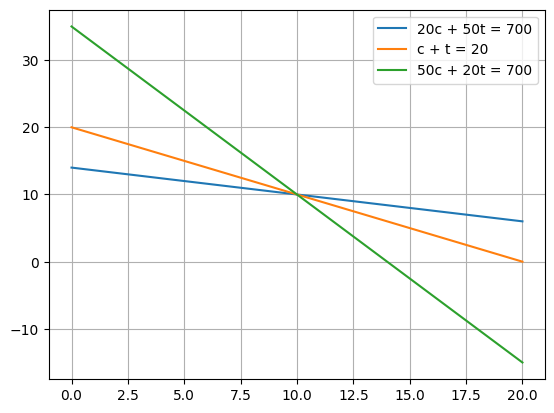

In [1]:
#Plot it!

import matplotlib.pyplot as plt
import numpy as np

# Define the x values
x = np.linspace(0, 20, 100)

# Calculate the y values for the first equation (20c + 50t = 700)
y1 = (700 - 20 * x) / 50

# Calculate the y values for the second equation (c + t = 20)
y2 = 20 - x

# Calculate the y values for the third equation (50c + 20t = 700)
y3 = (700 - 50 * x) / 20

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='50c + 20t = 700')

# Add a grid
plt.grid(True)
plt.legend()
plt.show()



In [5]:
#The arrays are:
# ~~ Question - what is the linear system and how do we solve it?

A = np.array([[20, 50], [1, 1], [50, 20]])
b = np.array([700, 20, 700])

#x = np.linalg.solve(A, b)

M = np.linalg.inv(A.T @ A)@A.T
print(np.linalg.pinv(A))
print(M-np.linalg.pinv(A))
print(M@b)





# ~~ Answer
# A = np.array([[20, 50], [1, 1], [50, 20]])
# b = np.array([700, 20, 700])

# #x = np.linalg.solve(A, b)

# M = np.linalg.inv(A.T @ A)@A.T
# print(M)
# print(np.linalg.pinv(A))
# print(M-np.linalg.pinv(A))
# print(M@b)


[[-0.00952672  0.000204    0.02380661]
 [ 0.02380661  0.000204   -0.00952672]]
[[-1.73472348e-18  2.71050543e-19  6.93889390e-18]
 [ 1.04083409e-17 -3.25260652e-19 -1.73472348e-18]]
[10. 10.]


#### Example: An overdetermined, inconsistent linear system


$20 c + 50 t = 700$

$  c+t = 20$

$ 60 c + 20 t = 700$

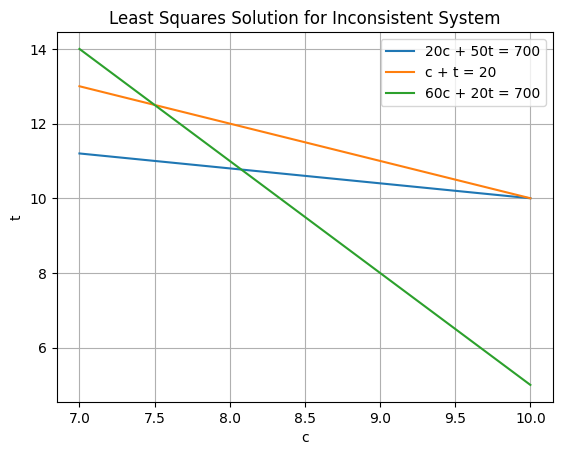

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x values
x = np.linspace(7, 10, 100)

# Calculate the y values for the first equation (20c + 50t = 700)
y1 = (700 - 20 * x) / 50

# Calculate the y values for the second equation (c + t = 20)
y2 = 20 - x

# Calculate the y values for the third equation (60c + 20t = 700)
y3 = (700 - 60 * x) / 20

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='60c + 20t = 700')

plt.xlabel('c')
plt.ylabel('t')
plt.title('Least Squares Solution for Inconsistent System')
plt.legend()
plt.grid(True)
plt.show()

Where do you think he solution is going to be?

[ 8.07704251 10.76953789]
[ 8.07704251 10.76953789]


<ipython-input-7-52bb65e377be>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_lsq,_,_,_ = np.linalg.lstsq(A,b)


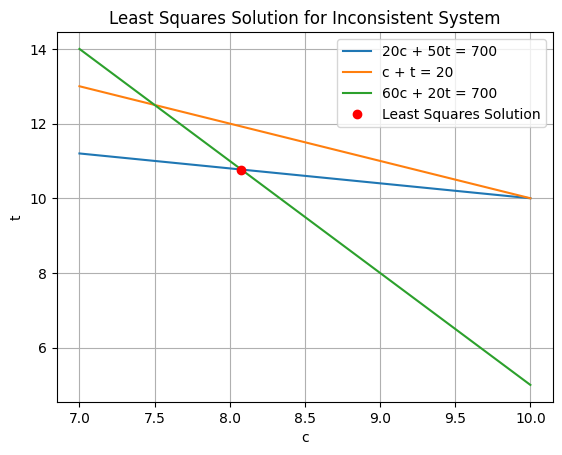

In [7]:
A = np.array([[20, 50], [1, 1], [60, 20]])
b = np.array([700, 20, 700])

#np.linalg.(A, b)
x_lsq = np.linalg.pinv(A)@b
print(x_lsq)
x_lsq,_,_,_ = np.linalg.lstsq(A,b)
print(x_lsq)

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='60c + 20t = 700')


plt.plot(x_lsq[0], x_lsq[1], 'ro', label='Least Squares Solution')
plt.xlabel('c')
plt.ylabel('t')
plt.title('Least Squares Solution for Inconsistent System')
plt.legend()
plt.grid(True)
plt.show()

Was this what you were expecting?

#Weights

As with most approximate methods, the moment we start to move away from an *exact solution* subtle effects start to show up!

Notice we are minimizing the *residuals* but there is a subtle problem with the problem definition above:

$$\begin{align}
20 c + 50 t &= 700  \\
c+t  &= 20 \\
60 c + 20 t &= 700
\end{align} $$

The coefficients of the second equation is about an order of magnitude lower than the others. Of course this system is equivilant to:

$$\begin{align}
20 c + 50 t &= 700  \\
10c+10t  &= 200 \\
60 c + 20 t &= 700
\end{align} $$

or even

$$\begin{align}
0.2 c + 0.5 t &= 7  \\
c+t  &= 20 \\
0.6 c + 0.2 t &= 7
\end{align} $$

What does this remind you of?


Jacobi (diagonal) preconditioning!

$$P^{-1} = \begin{bmatrix} W_{1} & 0 & 0 \\ 0 & W_{2} & 0 \\ 0 & 0 & W_{3} \end{bmatrix}
$$



If we define $r_1, r_2, r_3$:

$$\begin{align}
20 c + 50 t -700 &= r_1 \\
c+t -20 &= r_2 \\
60 c + 20 t -700 &= r_3
\end{align} $$

We say the residuals are / can be *weighted*, i.e.: the least squares problem becomes,

$$ Min_x \ of \ \sum W_i^2 r_i $$

Let's code it!




[[1 0 0]
 [0 7 0]
 [0 0 1]]
[ 8.08267345 10.78401744]


<ipython-input-13-2aa1c6412f60>:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_lsq,_,_,_ = np.linalg.lstsq(A,b)


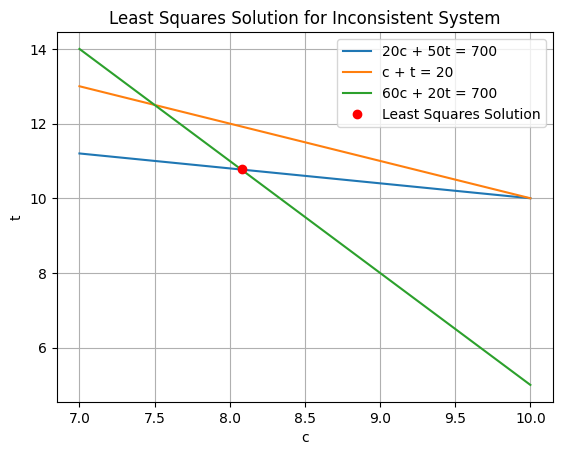

In [13]:
A = np.array([[20, 50], [1, 1], [60, 20]])
b = np.array([700, 20, 700])

#~~ Question: What's the preconditioner? How do we apply it?
Pi = np.diag([1,7,1])
print(Pi)
A = Pi@A
b = Pi@b
###

#~~ Answer
# Pi = np.diag([1,70,1])
# print(Pi)
# A = Pi@A
# b = Pi@b
###



x_lsq,_,_,_ = np.linalg.lstsq(A,b)

print(x_lsq)

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='60c + 20t = 700')


plt.plot(x_lsq[0], x_lsq[1], 'ro', label='Least Squares Solution')
plt.xlabel('c')
plt.ylabel('t')
plt.title('Least Squares Solution for Inconsistent System')
plt.legend()
plt.grid(True)
plt.show()

Weights are an excellent way to introduce measurement uncertainty into your fit!



# Polyfit

Let's return to our polynomial fitting armed with our new tool, and use it to separate the order of the polynomial from the number of data points.

An $n$th degree polynomial,

$$ y(x) = a_n x^n + a_{n-1} x^{n-1} \dots a_2 x^2 + a_1 x +a_0$$

can be applied to $m$ data points,

$y(x_i) = a_n x_i^n + a_{n-1} x_i^{n-1} \dots a_2 x_i^2 + a_1 x_i +a_0 = y_i$

to generate an $m \times n$ matrix, multiplied by an $n$ vector of polynomial coefficients to equal an $m$ vector of data:

$$
 \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \cdots & x_m^n
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix} =
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_m
\end{bmatrix}
$$

#### Example: Determine the coefficients of a cubic polynomial

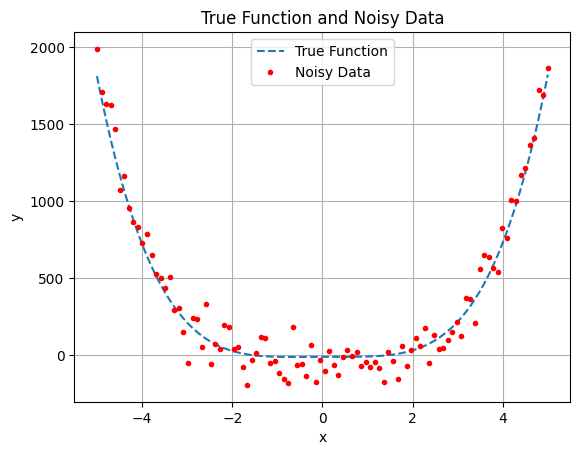

In [14]:
# prompt: generate 100 samples of the function 3x^4-2x^2+x-9 with +-100 noise. Plot the true curve with dashed lines and the data with small points in red.

import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = np.linspace(-5, 5, 100)

# Define the true function
def true_function(x):
  return 3 * x**4 - 2 * x**2 + x - 9

# Calculate the true y values
y_true = true_function(x)

# Generate noisy data
np.random.seed(0)  # For reproducibility
noise = np.random.normal(0, 100, 100)
x_data = np.linspace(-5, 5, 100)
y_data = true_function(x_data) + noise

# Plot the true curve and the data
plt.plot(x, y_true, '--', label='True Function')
plt.plot(x_data, y_data, 'ro', markersize=3, label='Noisy Data')

plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function and Noisy Data')
plt.legend()
plt.grid(True)
plt.show()


[[-1.25000000e+02  2.50000000e+01 -5.00000000e+00  1.00000000e+00]
 [-1.17576257e+02  2.40001020e+01 -4.89898990e+00  1.00000000e+00]
 [-1.10452422e+02  2.30206101e+01 -4.79797980e+00  1.00000000e+00]
 [-1.03622311e+02  2.20615243e+01 -4.69696970e+00  1.00000000e+00]
 [-9.70797404e+01  2.11228446e+01 -4.59595960e+00  1.00000000e+00]
 [-9.08185260e+01  2.02045710e+01 -4.49494949e+00  1.00000000e+00]
 [-8.48324846e+01  1.93067034e+01 -4.39393939e+00  1.00000000e+00]
 [-7.91154325e+01  1.84292419e+01 -4.29292929e+00  1.00000000e+00]
 [-7.36611859e+01  1.75721865e+01 -4.19191919e+00  1.00000000e+00]
 [-6.84635612e+01  1.67355372e+01 -4.09090909e+00  1.00000000e+00]
 [-6.35163748e+01  1.59192939e+01 -3.98989899e+00  1.00000000e+00]
 [-5.88134431e+01  1.51234568e+01 -3.88888889e+00  1.00000000e+00]
 [-5.43485822e+01  1.43480257e+01 -3.78787879e+00  1.00000000e+00]
 [-5.01156087e+01  1.35930007e+01 -3.68686869e+00  1.00000000e+00]
 [-4.61083388e+01  1.28583818e+01 -3.58585859e+00  1.00000000e

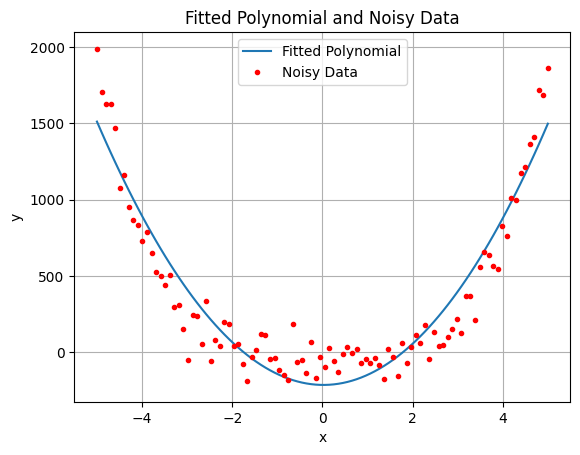

In [15]:
# prompt: Generate the vermonde matrix for a cubic polynomial, invert it using pinv and the y data to find the coefficients of the polynomial and then plot it along with the data

import matplotlib.pyplot as plt
import numpy as np
# Generate the Vandermonde matrix for a cubic polynomial
n = 3  # Degree of the polynomial
X = np.vander(x_data, n + 1)

# Calculate the coefficients using the pseudoinverse
coefficients = np.linalg.pinv(X) @ y_data

coeffs = np.polyfit(x_data, y_data, 3)
print('Coefficients calculated manually', coefficients, '\n')
print('Coefficients calculated with polyfit', coeffs)

# Generate y values for the fitted polynomial
fitted_polynomial = np.poly1d(coeffs)
y_fitted = fitted_polynomial(x)


# Plot the fitted polynomial along with the data
plt.plot(x, y_fitted, label='Fitted Polynomial')
plt.plot(x_data, y_data, 'ro', markersize=3, label='Noisy Data')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomial and Noisy Data')
plt.legend()
plt.grid(True)
plt.show()


#### Example 2: Find a series of 'best fit polynomials'

Degree 0: Residual Norm = 5515.03, Coefficients = [370.23]
Degree 1: Residual Norm = 5514.73, Coefficients = [-1.97, 370.23]
Degree 2: Residual Norm = 1759.53, Coefficients = [68.74, -1.97, -214.2]
Degree 3: Residual Norm = 1759.49, Coefficients = [0.06, 68.74, -2.93, -214.2]
Degree 4: Residual Norm = 923.52, Coefficients = [3.03, 0.06, 2.62, -2.93, -45.63]
Degree 5: Residual Norm = 917.81, Coefficients = [-0.08, 3.03, 2.38, 2.62, -15.58, -45.63]
Degree 6: Residual Norm = 917.57, Coefficients = [0.01, -0.08, 2.8, 2.38, 4.56, -15.58, -47.98]
Degree 7: Residual Norm = 916.86, Coefficients = [-0.0, 0.01, 0.1, 2.8, 0.23, 4.56, -9.51, -47.98]
Degree 8: Residual Norm = 916.67, Coefficients = [-0.0, -0.0, 0.05, 0.1, 2.15, 0.23, 7.55, -9.51, -50.1]
Degree 9: Residual Norm = 916.49, Coefficients = [0.0, -0.0, -0.02, 0.05, 0.45, 2.15, -2.0, 7.55, -5.65, -50.1]
Degree 10: Residual Norm = 916.28, Coefficients = [0.0, 0.0, -0.01, -0.02, 0.24, 0.45, 0.53, -2.0, 12.3, -5.65, -52.29]


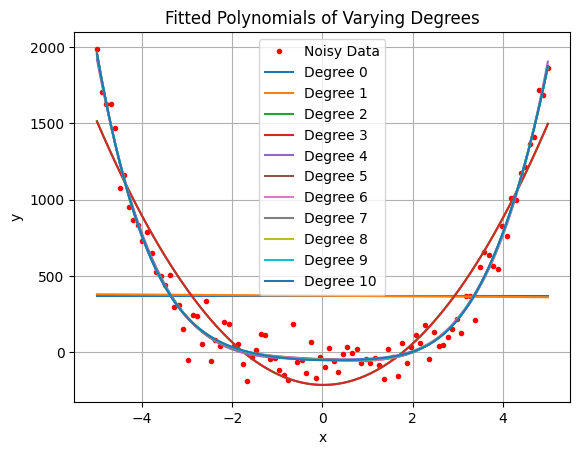

In [16]:
# prompt: parameterize polyfit for degrees 0 to 10, plotting each on the same plot along with the sample data. Output the norm of the residuals for each fit along with the coefficients to 2 decimal places

import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = np.linspace(-5, 5, 100)

# Define the true function
def true_function(x):
  return 3 * x**4 - 2 * x**2 + x - 9

# Generate noisy data
np.random.seed(0)  # For reproducibility
noise = np.random.normal(0, 100, 100)
x_data = np.linspace(-5, 5, 100)
y_data = true_function(x_data) + noise

# Plot the true curve and the data
plt.plot(x_data, y_data, 'ro', markersize=3, label='Noisy Data')

for degree in range(11):
    coeffs = np.polyfit(x_data, y_data, degree)
    fitted_polynomial = np.poly1d(coeffs)
    y_fitted = fitted_polynomial(x)
    plt.plot(x, y_fitted, label=f'Degree {degree}')
    residuals = y_data - fitted_polynomial(x_data)
    residual_norm = np.linalg.norm(residuals)
    print(f"Degree {degree}: Residual Norm = {residual_norm:.2f}, Coefficients = {[round(c, 2) for c in coeffs]}")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Polynomials of Varying Degrees')
plt.legend()
plt.grid(True)
plt.show()


Interesting points: The curve actually is 4th order but because additional terms will always reduce the error, it is not trivial to tell which is the *best*, best fit!

#### Example 3: Consider the condition number of the Vermonde matrix for increasing n

In [17]:
# prompt: print the condition number for an increasing series of vermonde matricies on 10 data points

import numpy as np
# Generate x values
x_data = np.linspace(-5, 5, 10)

for degree in range(1, 11):
    # Generate the Vandermonde matrix for a given degree
    X = np.vander(x_data, degree + 1)

    # Calculate the condition number
    condition_number = np.linalg.cond(X)

    print(f"Degree {degree}: Condition Number = {condition_number:.2f}")


Degree 1: Condition Number = 3.19
Degree 2: Condition Number = 20.60
Degree 3: Condition Number = 94.89
Degree 4: Condition Number = 583.63
Degree 5: Condition Number = 2841.25
Degree 6: Condition Number = 17743.56
Degree 7: Condition Number = 95457.72
Degree 8: Condition Number = 648343.57
Degree 9: Condition Number = 5082996.99
Degree 10: Condition Number = 25360712.21


Recall that as the condition number strays from 1, numerical algorithms deteriorate. This is why low-order polynomials are more numerically robust to fit than high order!

# Radial Basis Functions revisted!

The modern implementation of RBFs accoutns for the *global* trend of the data through a polynomial least squares fit alongside normal RBFs for local features.

$$ \begin{align}
y(x) &= \sum_i^N \omega_i \varphi_i(\|x-x_i\|) + \sum_i^N P_i(x_i) b_i
\end{align} $$

Where $P_i$ is an order $n\lt m$ polynomial. The Numpy RBFInterpolator object fits this equation to:

$$ \begin{align}
[\Phi(x_i, x_j) -\lambda I]\omega +P(x_i) b &= y_i \\
P(x_i)^T \omega &=0
\end{align} $$

where $\lambda = 0$ recovers an exact fit and $\lambda \gt 0$ effecitvely shifts the fitting of the $x_i=x_j$ terms to the bestfit polynomial.

####Example: Toy gaussian over a quadratic

In [21]:
#Sampled gaussian

import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
  return np.exp(-(x/2)**2)+.1*x**2

# Create x values for plotting
x_toy = np.linspace(-6, 6, 100)
y_toy = f(x_toy)

# Sample 11 times at 1-interval intervals
x_d = np.arange(-5, 6, 1)
y_d = f(x_d)

11


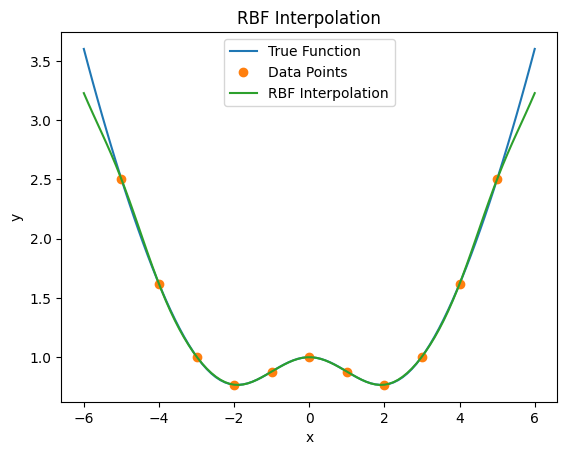

In [22]:
# prompt: Use a numpy scipy.interpolate.RBFInterpolator over x_d and y_d and plot the result against the true function

import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator

# Create an RBFInterpolator object
print(len(np.array([y_d]).T))
rbf = RBFInterpolator(np.array([x_d]).T, y_d.T, kernel='gaussian', epsilon=1, degree=2)

# Interpolate at the x_toy values
y_rbf = rbf(np.array([x_toy]).T)

# Plot the results
plt.plot(x_toy, y_toy, label='True Function')
plt.plot(x_d, y_d, 'o', label='Data Points')
plt.plot(x_toy, y_rbf, label='RBF Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('RBF Interpolation')
plt.show()
